# NORMALIZACIÓN DEL DATASET

Queremos que los resultados por parte del llm que sean distintos a los que se le mencionaron en el prompt se organicen en una categoría llamada "inconsistente"

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('./base_con_normalizacion.xlsx')

In [3]:
data.columns 

Index(['No', 'video_id', 'comment_id', 'Texto Comentario', 'likes',
       'Tipo Comentaro', 'Nombre del Video', 'Link del Video',
       'Fecha del Video', 'Nombre del noticiero', 'Query',
       'País del Presidente', 'Tipo Noticiero', 'País del Medio',
       'Nombre del Presidente', 'caracteres', 'respuesta_prompt1',
       'respuesta_prompt2', 'respuesta_prompt3', 'respuesta_prompt4',
       'respuesta_prompt5', 'respuesta_prompt6', 'respuesta_prompt7',
       'respuesta_prompt8', 'respuesta_prompt9', 'respuesta_prompt10',
       'respuesta_prompt9_procesado'],
      dtype='object')

El prompt 9 tuvo la particularidad de que asignó múltiples estiquetas a un mismo comentario, en este sentido, se creo una nueva columna que se llama **respuesta_prompt9_procesado** donde se le asigno a estos valores una doble categoría

In [6]:
# drop  respuesta_prompt9
data = data.drop(['respuesta_prompt9'], axis=1)

In [7]:
data.head(3)

,No,video_id,comment_id,Texto Comentario,likes,Tipo Comentaro,Nombre del Video,Link del Video,Fecha del Video,Nombre del noticiero,...,respuesta_prompt1,respuesta_prompt2,respuesta_prompt3,respuesta_prompt4,respuesta_prompt5,respuesta_prompt6,respuesta_prompt7,respuesta_prompt8,respuesta_prompt10,respuesta_prompt9_procesado
0,0,JjhSA-n0nro,UgxndzFrGAyaRihOLuZ4AaABAg,"Que pedantes entrevistadores, ni siquiera pude...",0.0,principal,Xóchitl Gálvez entrevista completa en Tercer G...,https://www.youtube.com/watch?v=JjhSA-n0nro,2024-05-14 06:05:34+00:00,Nmás,...,negativo,positivo,negativo,positivo,negativo,negativo,negativo,positivo,negativo,negativo
1,1,GpRrsWRhLyQ,UgwvHeWfBUat-Pp0CDJ4AaABAg,Para yo digo que ya basta a ka hipocresías San...,0.0,principal,"Santiago Creel, Mario Delgado y Laura Balleste...",https://www.youtube.com/watch?v=GpRrsWRhLyQ,2024-06-03 15:44:16+00:00,Nmás,...,negativo,negativo,negativo,negativo,negativo,negativo,negativo,negativo,negativo,negativo
2,2,DEbALmrsZs8,Ugxel5feZrbzNc-1BGt4AaABAg,que paso prianistas les quitaron el hueso ahor...,0.0,principal,Tercer debate presidencial 2024 | Programa com...,https://www.youtube.com/watch?v=DEbALmrsZs8,2024-05-20 04:44:35+00:00,Excélsior TV,...,negativo,negativo,negativo,negativo,negativo,negativo,negativo,negativo,negativo,negativo


In [8]:
data["respuesta_prompt9_procesado"].unique()

array(['negativo', 'negativo/neutral/positivo', 'neutral', 'positivo',
       'inconsistencia', 'neutral/positivo', 'positivo/negativo',
       'negativo/neutral'], dtype=object)

generación de vectores para prueba chi cuadrado en Wolfram:

In [28]:
import numpy as np

# Asignar el DataFrame a una variable
df = prompts

# Crear 10 vectores con tamaño 100000
diccionario_map = {'POSITIVO': 1, 'NEGATIVO': 2, 'NEUTRAL': 3, 'INCONSISTENTE': 4}

vectores = {}
for i in range(9, 11):
    vector_nombre = f'X{i}'
    vectores[vector_nombre] = df[f'prompt {i}'].replace(diccionario_map).values

# Guardar los vectores en un archivo txt
with open('vectores2.txt', 'w') as file:
    for nombre, vector in vectores.items():
        file.write(f"{nombre} = {vector.tolist()}\n")

In [ ]:
# Guardar los vectores pares en un archivo txt
with open('vectores_pares.txt', 'w') as file_pares:
    for i in range(2, 9, 2):
        vector_nombre = f'X{i}'
        file_pares.write(f"{vector_nombre} = {{{', '.join(map(str, vectores[vector_nombre]))}}};\n")

# Guardar los vectores impares en un archivo txt
with open('vectores_impares.txt', 'w') as file_impares:
    for i in range(1, 9, 2):
        vector_nombre = f'X{i}'
        file_impares.write(f"{vector_nombre} = {{{', '.join(map(str, vectores[vector_nombre]))}}};\n")



In [39]:
df = prompts
# drop Texto Comentario
df = df.drop(['Texto Comentario'], axis=1)

# Visualización de coincidencias y clasificaciones

In [ ]:
# Calcular los totales por fila
totales = df[['POSITIVO', 'NEUTRAL', 'NEGATIVO', 'INCONSISTENTE']].sum(axis=1)

# Crear una nueva tabla con el formato "conteo (porcentaje)"
contingency_table_total = pd.DataFrame({
    'POSITIVO': df['POSITIVO'].map(lambda x: f"{x} ({(x / totales.sum() * 100):.2f}%)"),
    'NEUTRAL': df['NEUTRAL'].map(lambda x: f"{x} ({(x / totales.sum() * 100):.2f}%)"),
    'NEGATIVO': df['NEGATIVO'].map(lambda x: f"{x} ({(x / totales.sum() * 100):.2f}%)"),
}, index=df.index)

# Imprimir la tabla con los conteos y porcentajes
print(contingency_table_total)


In [40]:
# Supongamos que tienes tus datos cargados en un DataFrame llamado 'df'
contingency_table_total = pd.DataFrame({
    'POSITIVO': (df == 'POSITIVO').sum(),
    'NEUTRAL': (df == 'NEUTRAL').sum(),
    'NEGATIVO': (df == 'NEGATIVO').sum(),

})

print(contingency_table_total)

           POSITIVO  NEUTRAL  NEGATIVO
prompt 1      18332    10806     70843
prompt 2      22142    10983     66874
prompt 3      18784    14194     67015
prompt 4      22615    10532     66851
prompt 5      17602    13073     69318
prompt 6      21123    12545     66330
prompt 7      18100    10625     71267
prompt 8      22504    11610     65885
prompt 9      19858     9466     69579
prompt 10     23198    10313     66482


In [48]:
# Calcular el total por columna (prompt)
totales_por_prompt = df.apply(lambda col: col.value_counts())

# Calcular los porcentajes por columna (prompt)
porcentajes_por_prompt = totales_por_prompt.div(totales_por_prompt.sum(axis=0), axis=1) * 100

# Combinar las cantidades y porcentajes en una tabla formateada
contingency_table_total = totales_por_prompt.fillna(0).astype(int).astype(str) + " (" + porcentajes_por_prompt.fillna(0).round(2).astype(str) + "%)"

# Reemplazar NaN por vacío (si alguna clasificación no está en un prompt)
contingency_table_total = contingency_table_total.fillna("0 (0.00%)")

# transponer la tabla
contingency_table_total = contingency_table_total.T

contingency_table_total 


,NEGATIVO,POSITIVO,NEUTRAL,INCONSISTENTE
prompt 1,70843 (70.84%),18332 (18.33%),10806 (10.81%),19 (0.02%)
prompt 2,66874 (66.87%),22142 (22.14%),10983 (10.98%),1 (0.0%)
prompt 3,67015 (67.02%),18784 (18.78%),14194 (14.19%),7 (0.01%)
prompt 4,66851 (66.85%),22615 (22.62%),10532 (10.53%),2 (0.0%)
prompt 5,69318 (69.32%),17602 (17.6%),13073 (13.07%),7 (0.01%)
prompt 6,66330 (66.33%),21123 (21.12%),12545 (12.54%),2 (0.0%)
prompt 7,71267 (71.27%),18100 (18.1%),10625 (10.62%),8 (0.01%)
prompt 8,65885 (65.89%),22504 (22.5%),11610 (11.61%),1 (0.0%)
prompt 9,69579 (69.58%),19858 (19.86%),9466 (9.47%),1097 (1.1%)
prompt 10,66482 (66.48%),23198 (23.2%),10313 (10.31%),7 (0.01%)


# Visualización de inconsistencias entre respuestas de los prompts

In [ ]:
# filtrar los inconsistentes
prompts = prompts[~prompts.isin(['INCONSISTENCIA'])]

In [ ]:
# Filtra las filas donde al menos un valor en las columnas (excepto la columna 'No') es diferente
filtered_prompts = prompts[prompts.drop(columns=['No']).apply(lambda row: len(set(row)) > 1, axis=1)]

# Muestra el DataFrame filtrado
filtered_prompts

,prompt 1,prompt 2,prompt 3,prompt 4,prompt 5,prompt 6,prompt 7,prompt 8,prompt 9,prompt 10,No
0,NEGATIVO,POSITIVO,NEGATIVO,POSITIVO,NEGATIVO,NEGATIVO,NEGATIVO,POSITIVO,NEGATIVO,NEGATIVO,0
6,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,INCONSISTENTE,NEUTRAL,6
10,NEGATIVO,NEGATIVO,NEGATIVO,NEGATIVO,NEGATIVO,NEGATIVO,NEGATIVO,NEGATIVO,NEGATIVO,POSITIVO,10
21,NEGATIVO,POSITIVO,POSITIVO,POSITIVO,POSITIVO,POSITIVO,NEGATIVO,POSITIVO,POSITIVO,POSITIVO,21
37,NEGATIVO,NEGATIVO,NEGATIVO,NEGATIVO,NEGATIVO,NEGATIVO,NEGATIVO,NEGATIVO,NEGATIVO,POSITIVO,37
...,...,...,...,...,...,...,...,...,...,...,...
99966,NEGATIVO,NEGATIVO,NEGATIVO,NEGATIVO,NEGATIVO,NEUTRAL,NEGATIVO,NEGATIVO,NEGATIVO,NEGATIVO,99966
99973,NEGATIVO,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEGATIVO,NEUTRAL,NEGATIVO,NEUTRAL,99973
99995,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEGATIVO,99995
99998,NEGATIVO,POSITIVO,NEUTRAL,POSITIVO,NEGATIVO,POSITIVO,NEGATIVO,POSITIVO,POSITIVO,POSITIVO,99998


In [ ]:
# numero de filas de filtered_prompts

len(filtered_prompts)

15332

# Matriz de proporción de coincidencias

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
# todas las respuestas que coincidan hacer una matriz de la proporción de coincidencias
# para cada par de columnas
import numpy as np

coincidencias = np.zeros((prompts.shape[1], prompts.shape[1]))

for i in range(prompts.shape[1]):
    for j in range(prompts.shape[1]):
        coincidencias[i, j] = (prompts.iloc[:, i] == prompts.iloc[:, j]).mean()

coincidencias = pd.DataFrame(coincidencias, columns=prompts.columns, index=prompts.columns)

coincidencias

,prompt 1,prompt 2,prompt 3,prompt 4,prompt 5,prompt 6,prompt 7,prompt 8,prompt 9,prompt 10
prompt 1,1.00000,0.93331,0.95215,0.93007,0.96255,0.92618,0.98350,0.92532,0.94084,0.92196
prompt 2,0.93331,1.00000,0.93924,0.97130,0.92931,0.95980,0.93096,0.97432,0.92213,0.95752
prompt 3,0.95215,0.93924,1.00000,0.93673,0.95626,0.93875,0.94995,0.93728,0.92137,0.92773
prompt 4,0.93007,0.97130,0.93673,1.00000,0.92487,0.95586,0.92769,0.96976,0.91931,0.95898
prompt 5,0.96255,0.92931,0.95626,0.92487,1.00000,0.93345,0.96054,0.92265,0.92604,0.91621
prompt 6,0.92618,0.95980,0.93875,0.95586,0.93345,1.00000,0.92409,0.95734,0.91228,0.94355
prompt 7,0.98350,0.93096,0.94995,0.92769,0.96054,0.92409,1.00000,0.92233,0.94008,0.91998
prompt 8,0.92532,0.97432,0.93728,0.96976,0.92265,0.95734,0.92233,1.00000,0.91581,0.95752
prompt 9,0.94084,0.92213,0.92137,0.91931,0.92604,0.91228,0.94008,0.91581,1.00000,0.91681
prompt 10,0.92196,0.95752,0.92773,0.95898,0.91621,0.94355,0.91998,0.95752,0.91681,1.00000


In [ ]:
coincidencias.to_csv('./results/matrices/coincidencias_matrix.csv', index=False)

# Análisis de embeddings

In [ ]:
import os 
import openai
from openai import OpenAI

In [ ]:
api_key = "API KEY"

In [ ]:
openai.api_key = os.getenv(api_key)

In [ ]:
client = OpenAI(
    api_key=api_key,
)

In [ ]:
# create a function that takes a string and returns the embedding with comparacion["prompt"]

def get_embedding(text):
    response = client.embeddings.create(
        input=text,
        model="text-embedding-3-small"
    )
    return response.data[0].embedding

# get the embeddings for each prompt
comparacion["prompt_embedding"] = comparacion["Prompt"].apply(get_embedding)

In [ ]:
comparacion.columns

Index(['# ', 'Prompt', 'prompt_embedding'], dtype='object')

In [ ]:
comparacion

,#,Prompt,prompt_embedding
0,prompt 1,Como IA con experiencia en análisis de lengua...,"[0.033301860094070435, 0.02005908079445362, -0..."
1,prompt 2,Realice la tarea de clasificación de sentimien...,"[0.01993970386683941, 0.027229370549321175, -0..."
2,prompt 3,Indique si el sentimiento es generalmente posi...,"[0.037569183856248856, 0.009977892972528934, -..."
3,prompt 4,Devuelva únicamente la etiqueta sin ningún otr...,"[0.027640076354146004, 0.032355405390262604, -..."
4,prompt 5,Como IA experto en procesamiento de lenguaje n...,"[0.026453128084540367, 0.021934326738119125, -..."
5,prompt 6,Realice la tarea de clasificación de sentimien...,"[0.01617933250963688, 0.01664418913424015, -0...."
6,prompt 7,Como IA con experiencia en análisis de lenguaj...,"[0.04267152026295662, 0.024358045309782028, -0..."
7,prompt 8,Debes realizar la tarea de clasificación de se...,"[0.026077784597873688, 0.02891603857278824, -0..."
8,prompt 9,IA experiencia análisis lenguaje emociones tar...,"[0.024891218170523643, 0.014691608026623726, -..."
9,prompt 10,Realice tarea clasificación sentimientos dado ...,"[0.002189741935580969, 0.002181319985538721, -..."


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [ ]:
embeddings = np.array(comparacion["prompt_embedding"].tolist())

In [ ]:
embeddings

array([[ 0.03330186,  0.02005908, -0.04185565, ..., -0.0100908 ,
         0.02358975,  0.0089993 ],
       [ 0.0199397 ,  0.02722937, -0.05051246, ..., -0.00605097,
         0.02433543,  0.00567827],
       [ 0.03756918,  0.00997789, -0.04414152, ..., -0.00462792,
         0.02481112,  0.01463424],
       ...,
       [ 0.02607778,  0.02891604, -0.0361077 , ..., -0.00443877,
         0.03636378,  0.00328907],
       [ 0.02489122,  0.01469161, -0.0303094 , ..., -0.01730808,
         0.0237798 , -0.00183066],
       [ 0.00218974,  0.00218132, -0.06486128, ..., -0.00686681,
         0.01997718, -0.01409295]])

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
# make embeddings_pca a DataFrame an enumerate the columns with the prompts 
embeddings_pca = pd.DataFrame(embeddings_pca, columns=["PCA1", "PCA2"])

embeddings_pca["# "] = comparacion["# "]

embeddings_pca

,PCA1,PCA2,#
0,0.405294,-0.061837,prompt 1
1,-0.329986,-0.026559,prompt 2
2,0.277559,-0.045579,prompt 3
3,-0.355123,-0.102406,prompt 4
4,0.336962,-0.154469,prompt 5
5,-0.345517,-0.035513,prompt 6
6,0.396796,-0.057429,prompt 7
7,-0.336033,-0.082919,prompt 8
8,0.274135,0.352630,prompt 9
9,-0.324087,0.214084,prompt 10


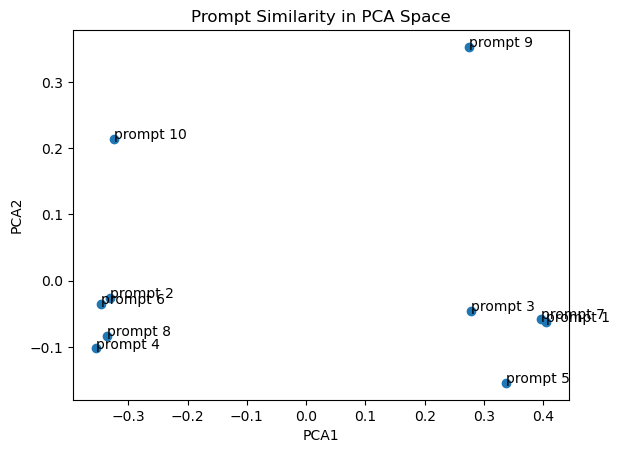

In [ ]:
# beautify the plot Prompt Similarity in PCA Space 
plt.figure()
plt.scatter(embeddings_pca["PCA1"], embeddings_pca["PCA2"])

for i, txt in enumerate(embeddings_pca["# "]):
    plt.annotate(txt, (embeddings_pca["PCA1"][i], embeddings_pca["PCA2"][i]))

plt.title("Prompt Similarity in PCA Space")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

plt.show()

In [ ]:
embeddings_pca

array([[ 0.4052941 , -0.06183731, -0.03126696],
       [-0.32998562, -0.02655925,  0.00612572],
       [ 0.27755939, -0.04557948,  0.04318959],
       [-0.35512304, -0.10240591,  0.20299713],
       [ 0.3369616 , -0.15446949, -0.18646175],
       [-0.34551657, -0.03551313, -0.07831782],
       [ 0.39679589, -0.05742942,  0.07654439],
       [-0.3360334 , -0.0829194 ,  0.05195744],
       [ 0.27413497,  0.35262986,  0.11731446],
       [-0.32408731,  0.21408353, -0.20208221]])

In [ ]:
pca.explained_variance_ratio_.sum()

0.7931074145194572

In [ ]:
# varianza explicada
pca.explained_variance_ratio_

array([0.60100049, 0.11533594, 0.07677099])

In [ ]:
import plotly.graph_objects as go

# Creamos el scatter plot 3D
fig = go.Figure(data=[go.Scatter3d(
    x=embeddings_pca[:, 0],
    y=embeddings_pca[:, 1],
    z=embeddings_pca[:, 2],
    mode='markers+text',
    text=comparacion["# "],  # Añade los textos a los puntos
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    )
)])

# Ajustamos el diseño
fig.update_layout(
    scene = dict(
        xaxis_title='Componente 1',
        yaxis_title='Componente 2',
        zaxis_title='Componente 3'
    ),
    title='Scatter Plot 3D de Embeddings'
)

# Mostramos el gráfico interactivo
fig.show()


Varianza acomulada de 71

# Cálculo de correlación entre embeddings

In [ ]:
# calcular la correlación de los embeddings y graficar la matriz de correlación
correlacion = np.corrcoef(embeddings)
correlacion = pd.DataFrame(correlacion, columns=comparacion["# "], index=comparacion["# "])

In [ ]:
correlacion

#,prompt 1,prompt 2,prompt 3,prompt 4,prompt 5,prompt 6,prompt 7,prompt 8,prompt 9,prompt 10
#,,,,,,,,,,
prompt 1,1.000000,0.706925,0.919130,0.652932,0.935783,0.673580,0.954926,0.677745,0.865569,0.659882
prompt 2,0.706925,1.000000,0.753571,0.935021,0.717294,0.960136,0.697870,0.959128,0.720985,0.915996
prompt 3,0.919130,0.753571,1.000000,0.710813,0.876740,0.740679,0.905974,0.734055,0.848644,0.709220
prompt 4,0.652932,0.935021,0.710813,1.000000,0.663266,0.908236,0.653347,0.913097,0.668365,0.844676
prompt 5,0.935783,0.717294,0.876740,0.663266,1.000000,0.710589,0.899590,0.693950,0.816722,0.666408
prompt 6,0.673580,0.960136,0.740679,0.908236,0.710589,1.000000,0.664355,0.928521,0.691874,0.905383
prompt 7,0.954926,0.697870,0.905974,0.653347,0.899590,0.664355,1.000000,0.693408,0.863206,0.642185
prompt 8,0.677745,0.959128,0.734055,0.913097,0.693950,0.928521,0.693408,1.000000,0.684880,0.881259
prompt 9,0.865569,0.720985,0.848644,0.668365,0.816722,0.691874,0.863206,0.684880,1.000000,0.720313


In [ ]:
correlacion.to_csv('./results/matrices/correlacion_matrix.csv', index=False)

In [ ]:
# hacer la matriz de distancia euclidiana entre los embeddings
from scipy.spatial.distance import pdist, squareform

distancias = pdist(embeddings)

distancias = squareform(distancias)

distancias = pd.DataFrame(distancias, columns=comparacion["# "], index=comparacion["# "])

distancias

#,prompt 1,prompt 2,prompt 3,prompt 4,prompt 5,prompt 6,prompt 7,prompt 8,prompt 9,prompt 10
#,,,,,,,,,,
prompt 1,0.000000,0.765280,0.402041,0.832784,0.358375,0.807643,0.300824,0.802524,0.518323,0.824418
prompt 2,0.765280,0.000000,0.701796,0.360261,0.751425,0.282271,0.777617,0.285893,0.746625,0.409652
prompt 3,0.402041,0.701796,0.000000,0.760234,0.496439,0.719979,0.433936,0.729067,0.550011,0.762323
prompt 4,0.832784,0.360261,0.760234,0.000000,0.820078,0.428123,0.832885,0.416788,0.813981,0.557028
prompt 5,0.358375,0.751425,0.496439,0.820078,0.000000,0.760170,0.449052,0.782014,0.605131,0.816303
prompt 6,0.807643,0.282271,0.719979,0.428123,0.760170,0.000000,0.819771,0.378243,0.784579,0.434824
prompt 7,0.300824,0.777617,0.433936,0.832885,0.449052,0.819771,0.000000,0.783167,0.523445,0.846112
prompt 8,0.802524,0.285893,0.729067,0.416788,0.782014,0.378243,0.783167,0.000000,0.793554,0.487133
prompt 9,0.518323,0.746625,0.550011,0.813981,0.605131,0.784579,0.523445,0.793554,0.000000,0.747541
